# Random forest

In order to evaluate the importance of cell nuclei morphoplogical features in our project, we performed random forest on DLPFC dataset. 

The inputs come from **merged_DR_morpho_features.ipynb** and correspond to the combinaison of the both modalities (gene expression data and morphological features merged).

# 1. Import packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Standardization
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# Features importance
import time
import numpy as np
from sklearn.inspection import permutation_importance

# CV
from sklearn.model_selection import cross_val_score

# 2. Function definition

In [1]:
def perform_random_forest(X, y):
    """Perform random forest and exctract feature importances.

    Parameters
    ----------
    X : pandas dataframe
        Feature
    Y : pandas dataframe
        Target
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Standardization
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf, 
                                     param_distributions = param_dist, 
                                     n_iter=5, 
                                     cv=5)

    # Fit the random search object to the data
    rand_search.fit(X_train, y_train)
    # Print the best hyperparameters
    print('Best hyperparameters:',  rand_search.best_params_)
    max_depth = rand_search.best_params_['max_depth']
    n_estimators = rand_search.best_params_['n_estimators']
    
    rf = RandomForestClassifier(max_depth= max_depth, n_estimators= n_estimators)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    start_time = time.time()
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    
    forest_importances = pd.Series(importances, index=X.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    start_time = time.time()
    result = permutation_importance(
        rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(result.importances_mean, index=X.columns)
    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

    scores = cross_val_score(rf, X, y, cv=20)
    scores

    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


# 151507

X : 

In [5]:
file = pd.read_csv('merged_DR_morpho_features/151507_merged_DR_morph_features.csv',sep=",")

In [22]:
file.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,1.654664,-0.673092,2.425896,-1.483760,-4.482498,-0.191414,0.406959,5.680560,3.724431,-0.351919,...,826.129605,8.463478,8.463478,8.463478,8.463478,0.646373,7.934684,610.307955,34.489661,215.821650
1,6.193448,-2.802720,9.458835,-6.058281,-17.244133,-1.000907,1.559313,22.227602,14.670843,-1.127734,...,338.075206,8.463478,8.463478,8.463478,8.463478,0.733465,7.074602,266.929328,41.061346,71.145878
2,2.825424,-1.219793,4.238115,-2.664030,-7.772860,-0.399962,0.703683,9.946430,6.547891,-0.553825,...,82.571565,227.753143,119.625553,34.864323,101.028579,0.095275,2.303611,43.350909,8.182686,39.220656
3,5.711505,-2.573211,8.705976,-5.573372,-15.888317,-0.916638,1.437945,20.459848,13.509497,-1.048710,...,998.691689,8.463478,8.463478,8.463478,8.463478,0.516560,8.612993,673.226773,36.858945,325.464917
4,4.218671,-1.876196,6.396073,-4.064845,-11.692710,-0.646941,1.059009,15.026652,9.905264,-0.791395,...,880.267860,8.463478,8.463478,8.463478,8.463478,0.299975,8.642052,517.797126,25.754779,362.470734


In [6]:
file.columns

Index(['Unnamed: 0', 'dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6',
       'dim_7', 'dim_8', 'dim_9', 'dim_10', 'Nuclei Area per object',
       'Texture inertia', 'Max Intensity', 'Mean Intensity', 'Min Intensity',
       'Modus', 'Texture Anisotropy', 'Texture Entropy', 'Texture Major Axis',
       'Texture Major Direction', 'Texture Minor Axis'],
      dtype='object')

In [7]:
del file["Unnamed: 0"]

In [8]:
file.columns

Index(['dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6', 'dim_7', 'dim_8',
       'dim_9', 'dim_10', 'Nuclei Area per object', 'Texture inertia',
       'Max Intensity', 'Mean Intensity', 'Min Intensity', 'Modus',
       'Texture Anisotropy', 'Texture Entropy', 'Texture Major Axis',
       'Texture Major Direction', 'Texture Minor Axis'],
      dtype='object')

Y : 

In [12]:
label = pd.read_csv('metadata_DPLFC/metadata_151507.tsv',sep="\t")
label.head()

,barcode,sample_name,tissue,row,col,imagerow,imagecol,Cluster,height,width,...,SpatialDE_PCA_spatial,SpatialDE_pool_PCA_spatial,HVG_PCA_spatial,pseudobulk_PCA_spatial,markers_PCA_spatial,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial
AAACAACGAATAGTTC-1,AAACAACGAATAGTTC-1,151507,1,0,16,113.141318,147.434749,6,600,600,...,3,5,5,4,3,1,1,1,1,1
AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,151507,1,50,102,383.438357,413.051319,3,600,600,...,4,1,2,3,1,2,2,1,2,1
AAACAATCTACTAGCA-1,AAACAATCTACTAGCA-1,151507,1,3,43,129.522957,231.008109,2,600,600,...,3,4,3,5,7,2,1,4,1,6
AAACACCAATAACTGC-1,AAACACCAATAACTGC-1,151507,1,59,19,431.188134,155.805586,5,600,600,...,7,6,7,7,7,7,8,7,8,1
AAACAGCTTTCAGAAG-1,AAACAGCTTTCAGAAG-1,151507,1,43,9,344.869499,125.067511,1,600,600,...,1,2,1,1,2,8,2,8,1,1


In [23]:
# Split the data into features (X) and target (y)
X = file
y = label.Cluster.values

Best hyperparameters: {'max_depth': 5, 'n_estimators': 417}
Accuracy: 0.5047318611987381
Elapsed time to compute the importances: 0.031 seconds
Elapsed time to compute the importances: 4.650 seconds


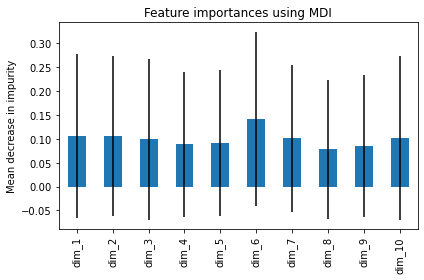

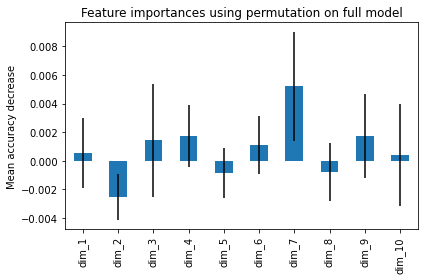

0.49 accuracy with a standard deviation of 0.04


In [64]:
perform_random_forest(X,y)

# 151669

In [69]:
file = pd.read_csv('merged_DR_morpho_features/151669_merged_DR_morph_features.csv',sep=",")

In [70]:
del file["Unnamed: 0"]
file.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,-0.032379,-3.708044,26.251950,-26.551332,-1.890461,-8.461801,-6.867267,14.207833,-0.486164,-13.296808,...,3313.586074,8.463478,8.463478,8.463478,8.463478,0.252112,9.945495,1895.765281,119.520535,1417.820793
1,0.018807,-2.370970,16.868067,-17.054436,-1.200497,-5.391017,-4.414094,9.133453,-0.295369,-8.545613,...,1015.830733,8.463478,8.463478,8.463478,8.463478,0.395313,8.639074,633.039883,5.414606,382.790849
2,0.047847,-1.533474,11.003612,-11.122798,-0.773004,-3.474298,-2.882515,5.959102,-0.176795,-5.580632,...,1416.198352,8.463478,8.463478,8.463478,8.463478,0.632175,8.324452,1035.365206,164.395658,380.833146
3,-0.020717,-3.449575,24.450558,-24.728966,-1.753689,-7.869233,-6.392747,13.234563,-0.449039,-12.378954,...,508.369836,8.463478,8.463478,8.463478,8.463478,0.878687,5.887086,453.370054,42.884698,54.999782
4,-0.042100,-4.030537,28.529696,-28.860031,-2.050231,-9.205667,-7.460717,15.440269,-0.530929,-14.447659,...,769.369481,8.463478,8.463478,8.463478,8.463478,0.748595,7.501883,614.804382,50.520097,154.565099


In [71]:
label = pd.read_csv('metadata_DPLFC/metadata_151669.tsv',sep="\t")
label.head()

,barcode,sample_name,tissue,row,col,imagerow,imagecol,Cluster,height,width,...,SpatialDE_PCA_spatial,SpatialDE_pool_PCA_spatial,HVG_PCA_spatial,pseudobulk_PCA_spatial,markers_PCA_spatial,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial
AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,151669,1,50,102,382.763290,457.335749,2,600,600,...,1,4,2,1,3,1,1,4,1,1
AAACACCAATAACTGC-1,AAACACCAATAACTGC-1,151669,1,59,19,430.738089,200.090016,5,600,600,...,6,5,4,3,1,3,1,2,4,1
AAACAGAGCGACTCCT-1,AAACAGAGCGACTCCT-1,151669,1,14,94,188.658872,432.943309,3,600,600,...,2,1,1,4,7,2,1,1,2,1
AAACAGGGTCTATATT-1,AAACAGGGTCTATATT-1,151669,1,47,13,366.021615,181.638170,5,600,600,...,6,5,4,3,1,3,4,2,1,1
AAACATTTCCCGGATT-1,AAACATTTCCCGGATT-1,151669,1,61,97,442.034219,441.719187,3,600,600,...,1,3,2,3,1,5,4,5,4,1


In [72]:
# Split the data into features (X) and target (y)
X = file
y = label.Cluster.values

In [73]:
# Split the data into features (X) and target (y)
X_dim =file.iloc[:,:10]

Best hyperparameters: {'max_depth': 3, 'n_estimators': 305}
Accuracy: 0.5532302092811647
Elapsed time to compute the importances: 0.023 seconds
Elapsed time to compute the importances: 5.602 seconds


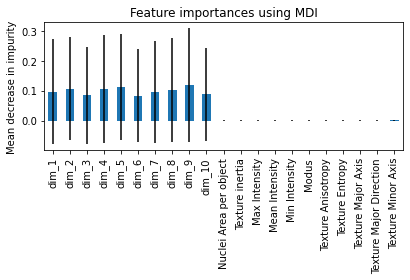

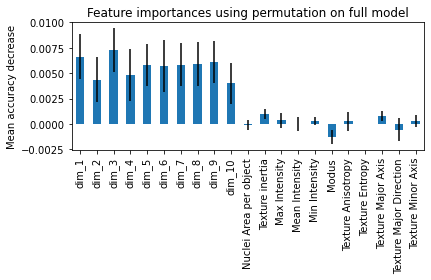

0.55 accuracy with a standard deviation of 0.03


In [74]:
perform_random_forest(X,y)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 375}
Accuracy: 0.5441310282074613
Elapsed time to compute the importances: 0.027 seconds
Elapsed time to compute the importances: 2.940 seconds


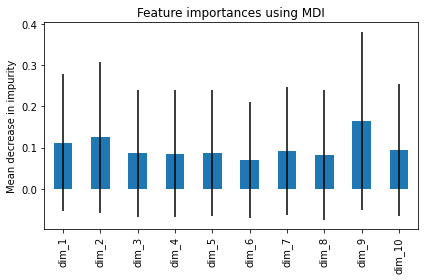

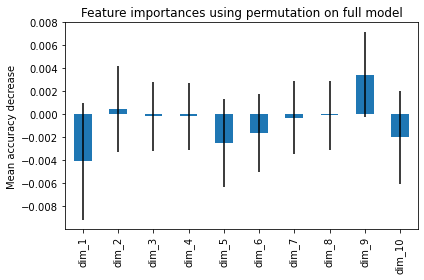

0.55 accuracy with a standard deviation of 0.03


In [75]:
perform_random_forest(X_dim,y)

# 151671

In [76]:
file = pd.read_csv('merged_DR_morpho_features/151671_merged_DR_morph_features.csv',sep=",")

In [77]:
del file["Unnamed: 0"]
file.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,-21.006111,8.958144,-18.851700,-33.531200,6.130475,-23.880331,-10.917730,-26.313498,18.505318,-9.107693,...,983.614601,8.463478,8.463478,8.463478,8.463478,0.505777,8.585046,658.278161,173.622947,325.336440
1,-13.748573,5.828470,-12.306840,-21.925205,3.977464,-15.633614,-7.104067,-17.215559,12.085285,-5.985287,...,4245.046398,255.000000,149.484194,37.979614,254.947017,0.320072,10.091865,2526.921992,105.277086,1718.124406
2,-14.928314,6.338592,-13.368834,-23.806013,4.324466,-16.974798,-7.726493,-18.684889,13.127982,-6.495980,...,5136.910593,240.769348,113.396047,29.618343,91.221237,0.335989,10.035268,3087.064663,75.984822,2049.845930
3,-15.674879,6.662968,-14.039804,-25.001375,4.548036,-17.822523,-8.118711,-19.623178,13.789108,-6.816168,...,3660.319815,244.306534,135.761935,57.350121,111.529140,0.295776,9.481092,2147.792885,23.744298,1512.526930
4,-15.918641,6.765576,-14.263665,-25.395607,4.623932,-18.098701,-8.244848,-19.934065,14.006263,-6.919493,...,859.531798,8.463478,8.463478,8.463478,8.463478,0.395383,8.608835,535.661524,51.721332,323.870274


In [78]:
label = pd.read_csv('metadata_DPLFC/metadata_151671.tsv',sep="\t")
label.head()

,barcode,sample_name,tissue,row,col,imagerow,imagecol,Cluster,height,width,...,SpatialDE_PCA_spatial,SpatialDE_pool_PCA_spatial,HVG_PCA_spatial,pseudobulk_PCA_spatial,markers_PCA_spatial,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial
AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,151671,1,50,102,388.658879,459.675983,5,600,600,...,3,2,3,4,3,1,2,1,6,1
AAACACCAATAACTGC-1,AAACACCAATAACTGC-1,151671,1,59,19,436.633678,202.385245,5,600,600,...,2,1,2,1,1,2,2,1,2,1
AAACAGAGCGACTCCT-1,AAACAGAGCGACTCCT-1,151671,1,14,94,194.509458,435.283543,6,600,600,...,1,2,4,3,2,4,3,3,3,1
AAACAGCTTTCAGAAG-1,AAACAGCTTTCAGAAG-1,151671,1,43,9,350.315044,171.602166,7,600,600,...,2,1,6,1,2,1,1,5,1,1
AAACAGGGTCTATATT-1,AAACAGGGTCTATATT-1,151671,1,47,13,371.917205,183.933400,1,600,600,...,3,2,3,4,3,2,2,1,7,1


In [79]:
# Split the data into features (X) and target (y)
X = file
y = label.Cluster.values

In [80]:
# Split the data into features (X) and target (y)
X_dim =file.iloc[:,:10]

Best hyperparameters: {'max_depth': 2, 'n_estimators': 134}
Accuracy: 0.46472019464720193
Elapsed time to compute the importances: 0.010 seconds
Elapsed time to compute the importances: 2.364 seconds


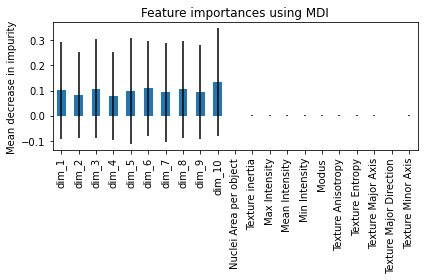

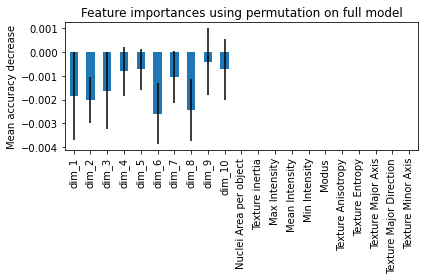

0.46 accuracy with a standard deviation of 0.02


In [81]:
perform_random_forest(X,y)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 385}
Accuracy: 0.4606650446066504
Elapsed time to compute the importances: 0.028 seconds
Elapsed time to compute the importances: 3.113 seconds


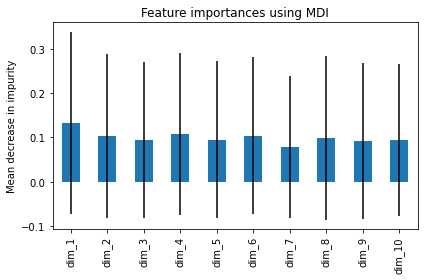

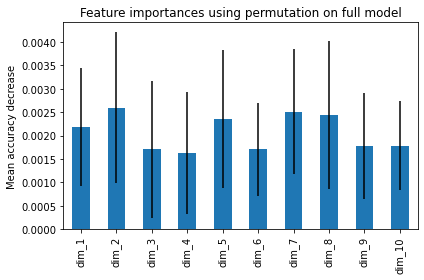

0.46 accuracy with a standard deviation of 0.02


In [82]:
perform_random_forest(X_dim,y)

# 151673

In [83]:
file = pd.read_csv('merged_DR_morpho_features/151673_merged_DR_morph_features.csv',sep=",")

In [84]:
del file["Unnamed: 0"]
file.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,Texture inertia,Max Intensity,Mean Intensity,Min Intensity,Modus,Texture Anisotropy,Texture Entropy,Texture Major Axis,Texture Major Direction,Texture Minor Axis
0,21.807194,2.567029,18.867867,-10.539822,18.429330,23.193333,-2.492150,-12.771133,11.181767,-12.429247,...,24655.804335,185.546249,12.264198,8.463478,8.463478,0.391970,10.790670,15332.926348,7.818946,9322.877987
1,4.963645,0.535576,4.181831,-2.415662,4.203759,5.209475,-0.629136,-2.923047,2.560918,-2.862252,...,1618.433606,8.463478,8.463478,8.463478,8.463478,0.309978,9.258061,957.640507,170.366037,660.793099
2,10.389523,1.186608,8.911389,-5.034423,8.785227,11.000340,-1.229374,-6.098672,5.336255,-5.943906,...,35126.131286,157.659729,19.153144,8.463478,8.463478,0.417149,12.145731,22191.683061,12.652386,12934.448225
3,12.620265,1.456959,10.859351,-6.111198,10.668478,13.383902,-1.475507,-7.401599,6.479130,-7.211139,...,718.754990,8.463478,8.463478,8.463478,8.463478,0.701569,7.691404,553.556567,69.644816,165.198424
4,11.459588,1.318880,9.847275,-5.549852,9.691551,12.145718,-1.349747,-6.722358,5.886029,-6.552395,...,4840.751040,244.590134,143.749484,76.612083,76.612083,0.255347,10.316672,2774.620980,155.915538,2066.130059


In [85]:
label = pd.read_csv('metadata_DPLFC/metadata_151673.tsv',sep="\t")
label.head()

,barcode,sample_name,tissue,row,col,imagerow,imagecol,Cluster,height,width,...,SpatialDE_PCA_spatial,SpatialDE_pool_PCA_spatial,HVG_PCA_spatial,pseudobulk_PCA_spatial,markers_PCA_spatial,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial
AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,151673,1,50,102,381.098123,440.639079,7,600,600,...,3,1,1,3,1,7,1,1,2,1
AAACAATCTACTAGCA-1,AAACAATCTACTAGCA-1,151673,1,3,43,126.327637,259.630972,4,600,600,...,7,5,2,2,3,2,1,4,2,3
AAACACCAATAACTGC-1,AAACACCAATAACTGC-1,151673,1,59,19,427.767792,183.078314,8,600,600,...,5,4,4,5,3,5,7,5,3,2
AAACAGAGCGACTCCT-1,AAACAGAGCGACTCCT-1,151673,1,14,94,186.813688,417.236738,6,600,600,...,3,3,1,2,2,3,4,2,1,1
AAACAGCTTTCAGAAG-1,AAACAGCTTTCAGAAG-1,151673,1,43,9,341.269139,152.700275,3,600,600,...,2,1,2,4,1,3,3,8,4,4


In [86]:
# Split the data into features (X) and target (y)
X = file
y = label.Cluster.values

In [87]:
# Split the data into features (X) and target (y)
X_dim =file.iloc[:,:10]

Best hyperparameters: {'max_depth': 4, 'n_estimators': 464}
Accuracy: 0.41117216117216115
Elapsed time to compute the importances: 0.034 seconds
Elapsed time to compute the importances: 8.217 seconds


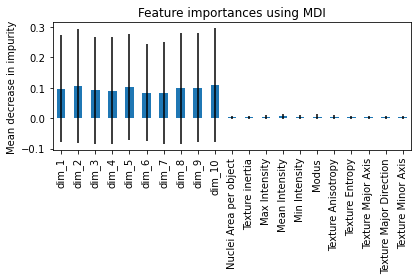

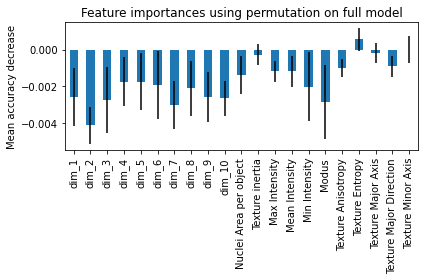

0.40 accuracy with a standard deviation of 0.02


In [88]:
perform_random_forest(X,y)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 241}
Accuracy: 0.3836996336996337
Elapsed time to compute the importances: 0.018 seconds
Elapsed time to compute the importances: 1.776 seconds


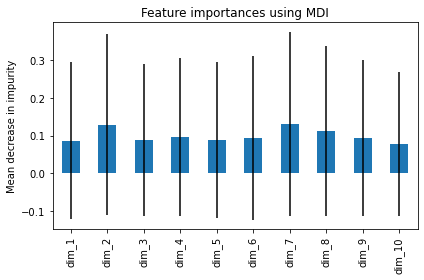

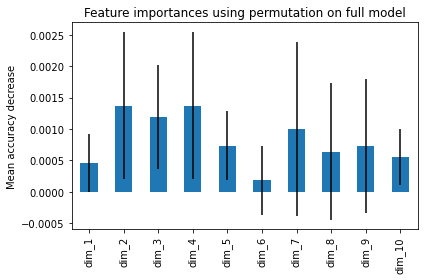

0.39 accuracy with a standard deviation of 0.02


In [89]:
perform_random_forest(X_dim,y)

# After reduction dimension with VAE

# 151507

In [7]:
file = pd.read_csv('/../../sbgenomics/project-files/data/latent_space_VAE/DPLFC_151507_latent_space_VAE.csv',sep=",")

In [8]:
del file["Unnamed: 0"]
file.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10
0,0.030067,0.013854,0.028229,0.021119,-0.038525,-0.023368,0.039977,-0.026640,0.037186,-0.016555
1,0.003276,0.013542,0.006474,0.007335,-0.003432,-0.006971,0.004101,-0.006127,0.002635,-0.009857
2,0.023174,0.013774,0.022632,0.017573,-0.029496,-0.019149,0.030747,-0.021362,0.028297,-0.014832
3,0.003276,0.013542,0.006474,0.007335,-0.003432,-0.006971,0.004101,-0.006127,0.002635,-0.009857
4,0.003276,0.013542,0.006474,0.007335,-0.003432,-0.006971,0.004101,-0.006127,0.002635,-0.009857


In [9]:
label = pd.read_csv('metadata_DPLFC/metadata_151507.tsv',sep="\t")
label.head()

,barcode,sample_name,tissue,row,col,imagerow,imagecol,Cluster,height,width,...,SpatialDE_PCA_spatial,SpatialDE_pool_PCA_spatial,HVG_PCA_spatial,pseudobulk_PCA_spatial,markers_PCA_spatial,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial
AAACAACGAATAGTTC-1,AAACAACGAATAGTTC-1,151507,1,0,16,113.141318,147.434749,6,600,600,...,3,5,5,4,3,1,1,1,1,1
AAACAAGTATCTCCCA-1,AAACAAGTATCTCCCA-1,151507,1,50,102,383.438357,413.051319,3,600,600,...,4,1,2,3,1,2,2,1,2,1
AAACAATCTACTAGCA-1,AAACAATCTACTAGCA-1,151507,1,3,43,129.522957,231.008109,2,600,600,...,3,4,3,5,7,2,1,4,1,6
AAACACCAATAACTGC-1,AAACACCAATAACTGC-1,151507,1,59,19,431.188134,155.805586,5,600,600,...,7,6,7,7,7,7,8,7,8,1
AAACAGCTTTCAGAAG-1,AAACAGCTTTCAGAAG-1,151507,1,43,9,344.869499,125.067511,1,600,600,...,1,2,1,1,2,8,2,8,1,1


In [10]:
# Split the data into features (X) and target (y)
X = file
y = label.Cluster.values

Best hyperparameters: {'max_depth': 3, 'n_estimators': 455}
Accuracy: 0.44952681388012616
Elapsed time to compute the importances: 0.032 seconds
Elapsed time to compute the importances: 4.173 seconds


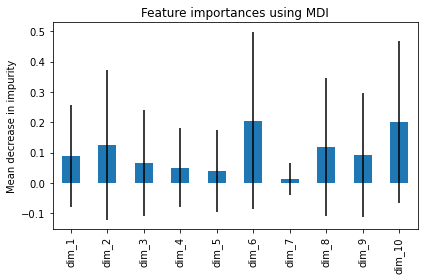

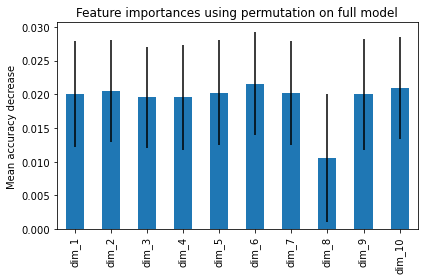

0.46 accuracy with a standard deviation of 0.03


In [11]:
perform_random_forest(X,y)